In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
from sklearn.manifold import TSNE
import sys
sys.path.append('/orions4-zfs/projects/lins2/Lin_Space/Git_Repos')
from general_tools.in_out.basics import unpickle_data
from general_tools.clustering.plt import plot_2d_embedding_in_grid_greedy_way, plot_2d_embedding_in_grid_forceful
from general_tools.in_out import create_dir
from geo_tool import Point_Cloud

from tf_lab.autopredictors.scripts.virt_scan_data import plotting_default_params, pc_sampler, pc_loader
from tf_lab.autopredictors.scripts.helper import shape_net_core_synth_id_to_category

In [52]:
tsne_saved_data = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/iccv/tsne_stats/chamfer-tsne-data.pkl'
ids, latent_emb = unpickle_data(tsne_saved_data)

In [40]:
tokens = [i.split('.') for i in ids]
syn_ids = np.array([token[0] for token in tokens], dtype=object)
model_names = np.array([token[1] for token in tokens], dtype=object)
scan_ids = np.array([token[2] for token in tokens], dtype=object)

In [41]:
# Generate 'some' randomly chosen images per class of objects (will be used as thumbnail in TSNE plot)
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/Point_Clouds/Partial_PCs/Angela_synthetic/2048/'
top_image_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/Point_Clouds/Partial_PCs/Angela_synthetic/2048/images'
create_dir(top_image_dir)

u_syn_ids = np.unique(syn_ids)
samples_per_class = 50
selected = []
for syn_id in np.unique(syn_ids):
    in_class = np.where(syn_ids == syn_id)[0]
    selected += np.ndarray.tolist(np.random.choice(in_class, samples_per_class, replace=False))

plt.ioff()    
for i in selected:
    in_f = osp.join(top_in_dir, syn_ids[i], model_names[i] + scan_ids[i] + '.ply')
    points = pc_loader(in_f)[0]
    category_i = shape_net_core_synth_id_to_category[syn_ids[i]]
    params = plotting_default_params(category_i)
    save_name = syn_ids[i] + '.' + model_names[i] + '.' + scan_ids[i] + '.png'
    fig = Point_Cloud(points=points).plot(show=False, show_axis=False, **params);
    fig.savefig(osp.join(top_image_dir, save_name))
    plt.close()

In [42]:
# Find TSNE of sub-selected objects.
seed = 42
model = TSNE(n_components=2, random_state=seed, init='pca', verbose=True)
tsne_small = model.fit_transform(latent_emb[selected])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.573253
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.635495
[t-SNE] Error after 175 iterations: 0.635495


In [43]:
# Make a list with the file-names of all to be used images.
image_files = []
for i in selected:
    save_name = syn_ids[i] + '.' + model_names[i] + '.' + scan_ids[i] + '.png'
    image_files.append(osp.join(top_image_dir, save_name))

In [44]:
plot_2d_embedding_in_grid_greedy_way(tsne_small, image_files, big_dim=2500, small_dim=200, save_file='tsne_1.png');

In [53]:
# LIN try your implementation here:
plot_2d_embedding_in_grid_forceful(tsne_small, image_files, big_dim=2500, small_dim=200, save_file='tsne_test.png');

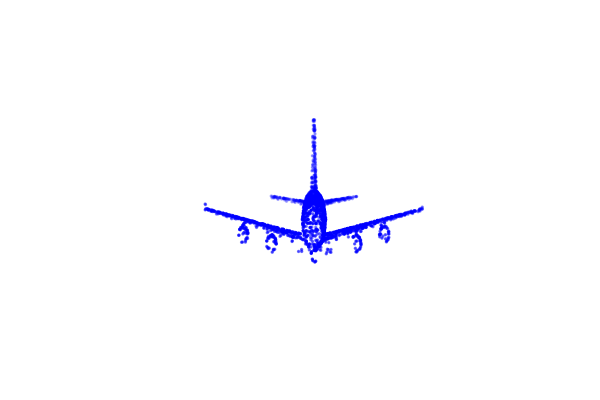

/orions4-zfs/projects/lins2/Panos_Space/DATA/Point_Clouds/Partial_PCs/Angela_synthetic/2048/images/02691156.3db61220251b3c9de719b5362fe06bbb.__5__.png


In [49]:
from IPython.display import Image,display
display(Image(image_files[1]))
print(image_files[3])
plt.show(image_files[0])